<a href="https://colab.research.google.com/github/kunalNbadgujar/ANDROID-AUTHENTICITY-PREDICTION/blob/main/Osteoarthritis_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split 

import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = r'/content/drive/MyDrive/Internshala Assignement/assignment 4 ( Osteoarthritis )/Osteoarthritis_Assignment_dataset/train'
validation_dir = r'/content/drive/MyDrive/Internshala Assignement/assignment 4 ( Osteoarthritis )/Osteoarthritis_Assignment_dataset/Valid'
test_dir = r'/content/drive/MyDrive/Internshala Assignement/assignment 4 ( Osteoarthritis )/Osteoarthritis_Assignment_dataset/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range = 40,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2350 images belonging to 2 classes.
Found 641 images belonging to 2 classes.


In [ ]:
  from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.applications.inception_v3 import InceptionV3


In [ ]:

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26,521,889
Trainable params: 26,487,457
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=32,
      callbacks=[checkpoint_cb])

<ipython-input-13-d696c619e5f6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 685s 7s/step - loss: 1.2893 - acc: 0.6558 - val_loss: 10.0729 - val_acc: 0.6812
Epoch 2/30
100/100 [==============================] - 544s 5s/step - loss: 0.4628 - acc: 0.7850 - val_loss: 1.7309 - val_acc: 0.8000
Epoch 3/30
100/100 [==============================] - 544s 5s/step - loss: 0.4317 - acc: 0.8055 - val_loss: 0.6988 - val_acc: 0.7234
Epoch 4/30
100/100 [==============================] - 551s 6s/step - loss: 0.4052 - acc: 0.8166 - val_loss: 0.9210 - val_acc: 0.6719
Epoch 5/30
100/100 [==============================] - 538s 5s/step - loss: 0.4008 - acc: 0.8266 - val_loss: 0.2989 - val_acc: 0.9047
Epoch 6/30
100/100 [==============================] - 551s 6s/step - loss: 0.4194 - acc: 0.8141 - val_loss: 1.9636 - val_acc: 0.8672
Epoch 7/30
100/100 [==============================] - 547s 5s/step - loss: 0.3500 - acc: 0.8595 - val_loss: 0.8477 - val_acc: 0.7500
Epoch 8/30
100/100 [==============================] - 544s 5s/step -

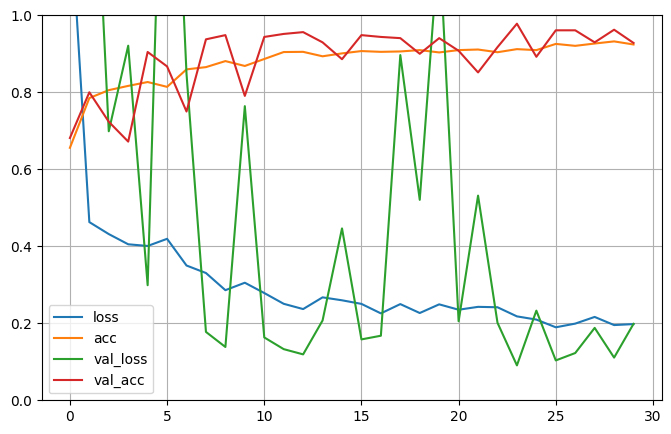

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()